# Example of Time Series Data

*Version 1*

**Contents**

  1. Section 1: Load data and Create Timestamp Index
      1. Section 1.1: Adding a Timestamp Variable
      2. Section 1.2: The Variables in the Data Set    
  2. Section 2: Trends
      1. Section 2.1: Trend over All Years 
      2. Section 2.2: Trend over 
      3. Section 2.3: 
  3. Section 3: Resampling: Changing the Data Frequency
      1. Daily Data
      2. Monthly Data
  4. Section 4: Moving Average
  5. Section 5: Stochastic Process
      1. Section 5.1: Gaussian Noise and the Random Walk
      2. Section 5.2: Scatters and Distributions
      3. Section 5.3: Periodic Processes
  6. Section 6: Time Series Regression
      1. Section 6.1: Challenge of Forecasting pm2.5 Tomorrow from Today's Value
      2. Section 6.2: Proposed Regression
  7. Section 7: Auto-Correlation

The data is about population in Beijing, with hourly values of PM2.5 (small particles of pollution) together with some weather data. The data set is from the UCI [Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data). There are five years of data, recorded between 2010 and 2015. Here is a [link to a page on the US Embassy site](https://china.usembassy-china.org.cn/embassy-consulates/beijing/air-quality-monitor/). The data has been the cause of some controversy. 

## Section 1: Load Data and Create Timestamp Index

The time and day is recorded as 4 separate variables: year, month, day and hour. We first create a `Timestamp` object and then make it the index. The original variables are discarded.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
beijing = pd.read_csv('PRSA.csv', )
beijing

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


### Section 1.1: Add a `Timestamp` Variable

In [3]:
def makeTime(row):
    return pd.Timestamp(row.year,row.month,row.day, row.hour)

beijing2 = beijing.assign(Time = beijing.apply(makeTime, axis=1))
beijing2 = beijing2.drop(labels=['No','year','month','day','hour'],axis=1)
beijing2 = beijing2.set_index(keys='Time')
beijing2.iloc[100:105]

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
Time,,,,,,,,
2010-01-05 04:00:00,28.0,-27,-19.0,1035.0,NW,218.57,0,0
2010-01-05 05:00:00,28.0,-27,-16.0,1034.0,NE,4.92,0,0
2010-01-05 06:00:00,27.0,-26,-16.0,1035.0,NE,8.05,0,0
2010-01-05 07:00:00,27.0,-27,-16.0,1034.0,NE,13.86,0,0
2010-01-05 08:00:00,27.0,-26,-16.0,1035.0,NE,18.78,0,0


### Section 1.2: Variables in the Data Set
The following table shows the variables in the data set:
  * The pm2.5 is fine particulate matter, which a pollutant that is thought to cause damage to the lungs
  * The dew point is a measure of humidity: it the temperature at which the air becomes saturated. 
  * The data were recorded by the US embassy so the temperature is in Fahrenheit

| variable | Meaning |
| ---- | ---- |
| Time | Time in year, month, day and hour |
| pm2.5 |  PM2.5 concentration (ug/m^3) |
| DEWP |  Dew Point (f) |
| TEMP |  Temperature (f) |
| PRES |  Pressure (hPa) |
| cbwd |  Combined wind direction |
| Iws |  Cumulated wind speed (m/s) |
| Is |  Cumulated hours of snow |
| Ir |  Cumulated hours of rain |



## Section 2: Plotting Time Trends

It is straightforward to plot a trend by selecting on of the variables.

### Section 2.1: Trends over All Years


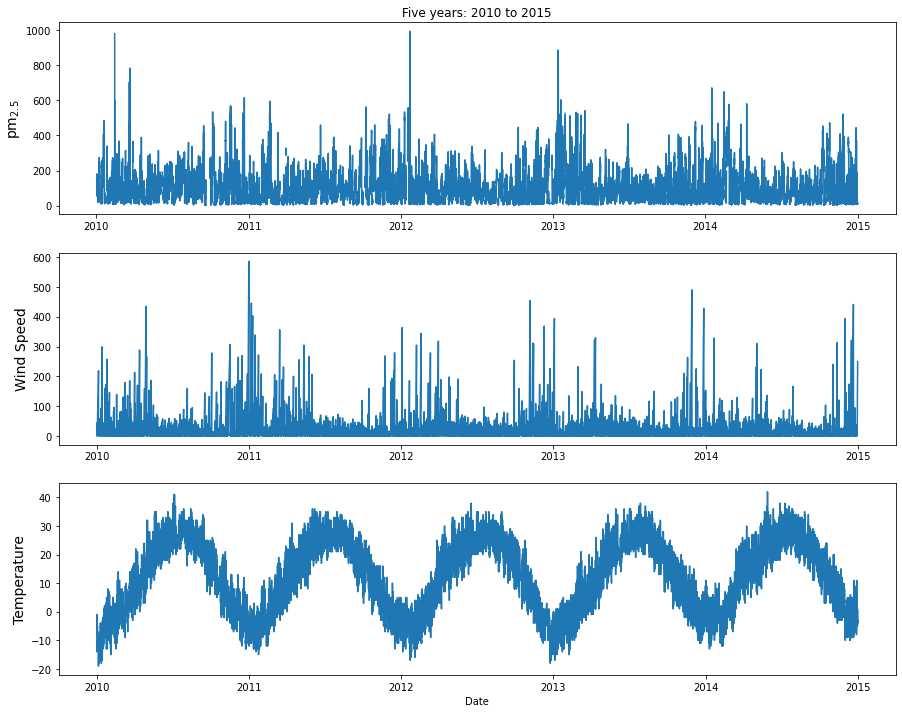

In [4]:
fig, (a1, a2, a3) = plt.subplots(3, 1, figsize=(15, 12))
a1.set_title('Five years: 2010 to 2015')
a1.plot(beijing2.loc[:,'pm2.5'])
a1.set_ylabel('pm$_{2.5}$', fontsize=14)
a2.plot(beijing2.loc[:,'Iws'])
a2.set_ylabel('Wind Speed', fontsize=14)
a3.plot(beijing2.loc[:,'TEMP'])
a3.set_ylabel('Temperature', fontsize=14)
_ = a3.set_xlabel('Date')


### Section 2.2: Trends between a Start and End Point

A selected part of the timeline can be examined by specifying a start and end date, using a **Timestamp** object. We first show a three month sub-period. 

Text(0.5, 0, 'Date')

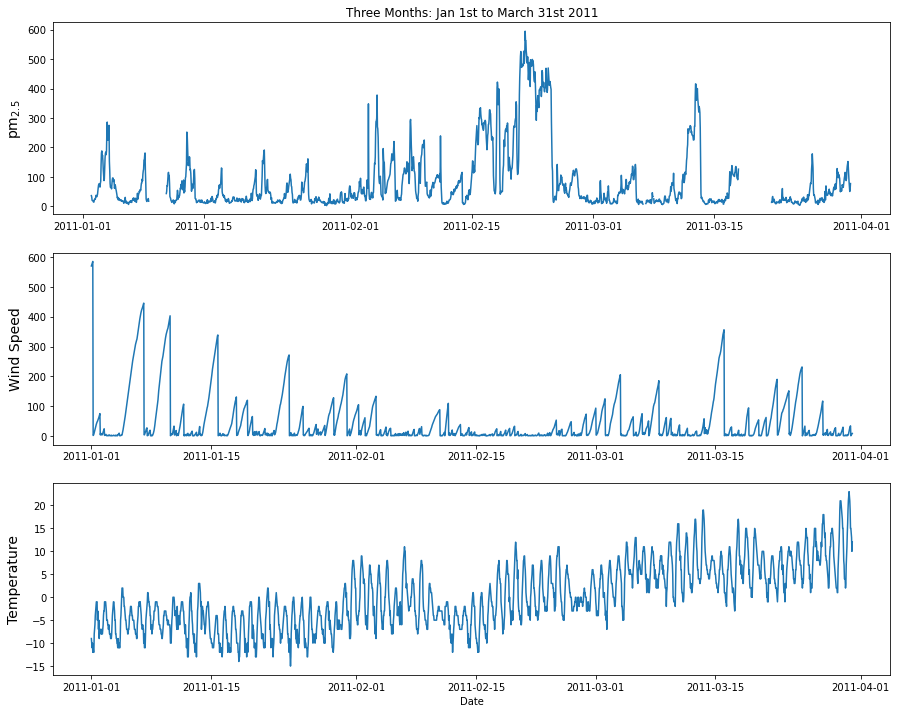

In [5]:
jan_1_11 = pd.Timestamp(2011,1,1,0)
mar_31_11 = pd.Timestamp(2011,3,31,0)

fig, (a1, a2, a3) = plt.subplots(3, 1, figsize=(15, 12))
a1.plot(beijing2.loc[jan_1_11:mar_31_11,'pm2.5'])
a2.plot(beijing2.loc[jan_1_11:mar_31_11,'Iws'])
a3.plot(beijing2.loc[jan_1_11:mar_31_11,'TEMP'])

a1.set_title('Three Months: Jan 1st to March 31st 2011')
a1.set_ylabel('pm$_{2.5}$', fontsize=14)
a2.set_ylabel('Wind Speed', fontsize=14)
a3.set_ylabel('Temperature', fontsize=14)
a3.set_xlabel('Date')

**Using DateOffset**
As well as using the **Timestamp** class, there is also a **DateOffset** which can be used to do arithmetic on dates (adding a period) in a calendar-aware way. The offset can be scaled as well. We use this below to  look at a two week period.


In [6]:
addyear = pd.DateOffset(years=1)
addWeek = pd.DateOffset(days=7)

Text(0.5, 0, 'Date')

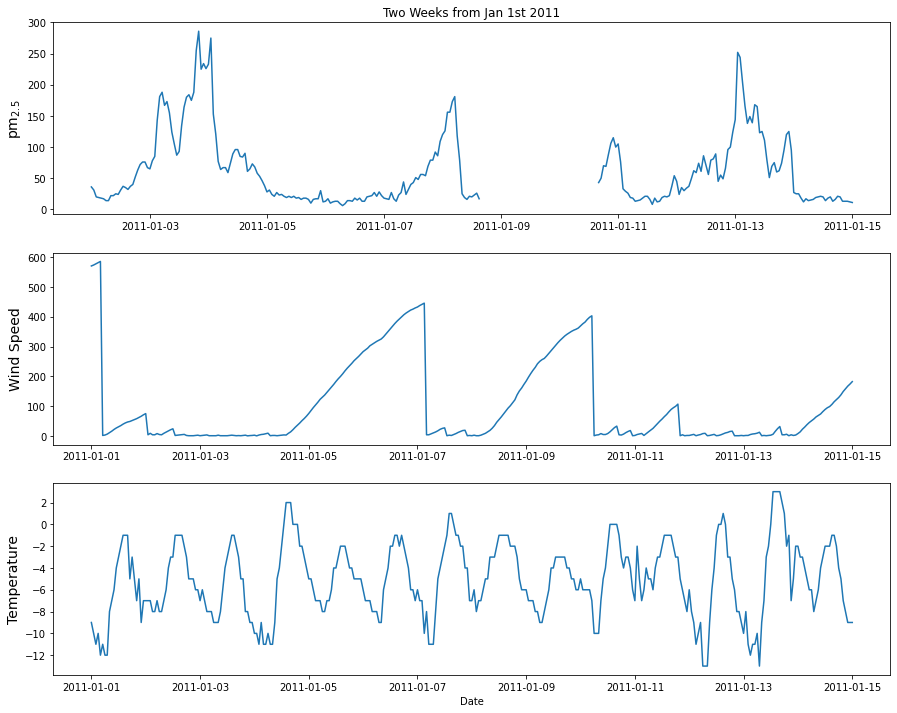

In [7]:
fig, (a1, a2, a3) = plt.subplots(3, 1, figsize=(15, 12))
a1.plot(beijing2.loc[jan_1_11:jan_1_11+(2 * addWeek),'pm2.5'])
a2.plot(beijing2.loc[jan_1_11:jan_1_11+(2 * addWeek),'Iws'])
a3.plot(beijing2.loc[jan_1_11:jan_1_11+(2 * addWeek),'TEMP'])

a1.set_title('Two Weeks from Jan 1st 2011')
a1.set_ylabel('pm$_{2.5}$', fontsize=14)
a2.set_ylabel('Wind Speed', fontsize=14)
a3.set_ylabel('Temperature', fontsize=14)
a3.set_xlabel('Date')

## Section 3: Resampling: Changing the Frequency

Hourly data such as we have can be down sampled to a longer period. The hourly data needs to be aggregated in some way. Pandas provides a function for this. We 
use this to calculate:

* Daily data, combining 24 hourly values
* Monthly data, combining all the data points in the same month. 

### Section 3.1: Daily Data
We use the the `resample` function to collect `24H` of data. The list of ways to specify periods is given here: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [8]:
bdaily = pd.DataFrame(data = {
    'maxTemp' : beijing2.loc[:,'TEMP'].resample('24H').max(),
    'minTemp' : beijing2.loc[:,'TEMP'].resample('24H').min(),
    'meanTemp' : beijing2.loc[:,'TEMP'].resample('24H').mean(),
    'pm_av' : beijing2.loc[:,'pm2.5'].resample('24H').mean(),
})
bdaily[0:5]

,maxTemp,minTemp,meanTemp,pm_av
Time,,,,
2010-01-01,-1.0,-14.0,-6.750000,NaN
2010-01-02,-4.0,-6.0,-5.125000,145.958333
2010-01-03,-6.0,-11.0,-8.541667,78.833333
2010-01-04,-9.0,-15.0,-11.500000,31.333333
2010-01-05,-11.0,-19.0,-14.458333,42.458333


Text(0.5, 1.0, 'Average Daily Temp')

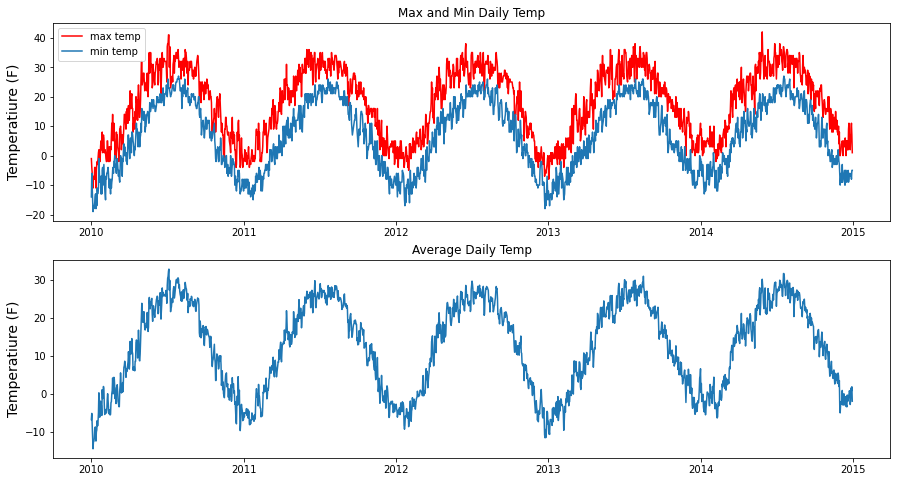

In [9]:
fig, (a1, a2) = plt.subplots(2, 1, figsize=(15, 8))
a2.plot(bdaily.loc[:,'meanTemp'])
a1.plot(bdaily.loc[:,'maxTemp'], color='r', label='max temp')
a1.plot(bdaily.loc[:,'minTemp'], label='min temp')
a1.legend()

a1.set_title('Max and Min Daily Temp')
a1.set_ylabel('Temperatiure (F)', fontsize=14)
a2.set_ylabel('Temperatiure (F)', fontsize=14)
a2.set_title('Average Daily Temp')


### Section 3.2: Monthly Data
We create the monthly mean and minimum. 

In [10]:
bmonthly = pd.DataFrame(data = {
      'pm_av' : beijing2.loc[:,'pm2.5'].resample('1MS').mean(),
      'temp_min' : beijing2.loc[:,'TEMP'].resample('1MS').min()})
bmonthly[0:5]

,pm_av,temp_min
Time,,
2010-01-01,90.442573,-19.0
2010-02-01,97.233979,-15.0
2010-03-01,94.100141,-9.0
2010-04-01,80.029248,-1.0
2010-05-01,86.899593,8.0


Text(0, 0.5, 'PM$_{2.5}$ Concentration')

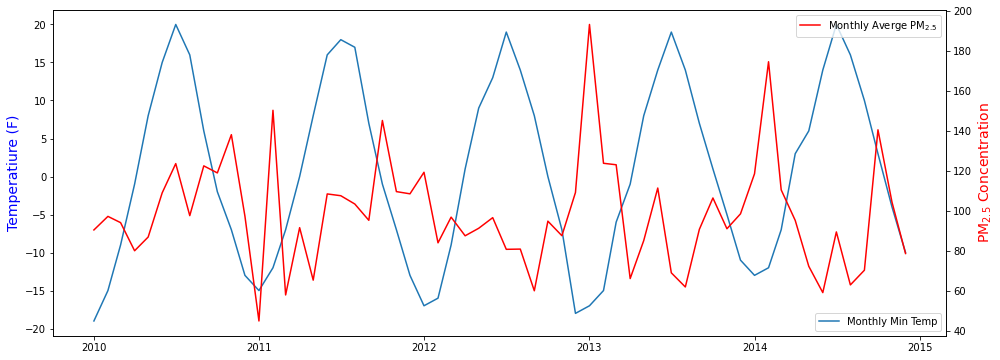

In [11]:
fig, a1 = plt.subplots(1, 1, figsize=(16, 6))
a1.plot(bmonthly.loc[:,'temp_min'], label='Monthly Min Temp')

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(bmonthly.loc[:,'pm_av'], color='r', label = 'Monthly Averge PM$_{2.5}$')


a1.legend()
a2.legend()
a1.set_ylabel('Temperatiure (F)', fontsize=14, color='b')
a2.set_ylabel('PM$_{2.5}$ Concentration', fontsize=14, color='r')

## Section 4: Moving Average

A moving (or rolling) average can be used to smooth out rapid fluctuation. Note that unlike the resampling, a moving average does not change the number of data points (except that those before the first full period of the average become NaN).

In [12]:
b3 = pd.DataFrame(data = {
    'pm' : beijing2.loc[:,'pm2.5'],
    'pmsmooth' : beijing2.loc[:,'pm2.5'].rolling('24H').mean() })
b3

,pm,pmsmooth
Time,,
2010-01-01 00:00:00,NaN,NaN
2010-01-01 01:00:00,NaN,NaN
2010-01-01 02:00:00,NaN,NaN
2010-01-01 03:00:00,NaN,NaN
2010-01-01 04:00:00,NaN,NaN
...,...,...
2014-12-31 19:00:00,8.0,11.291667
2014-12-31 20:00:00,10.0,10.625000
2014-12-31 21:00:00,10.0,10.208333


We use the `TimeStamp` and `DateOffset` objects to look at the 24 hours rolling average for two 1 month periods. You can see that as well as smoothing the average creates a lag (delay).

Text(0.5, 1.0, 'Month from April 1st 2012')

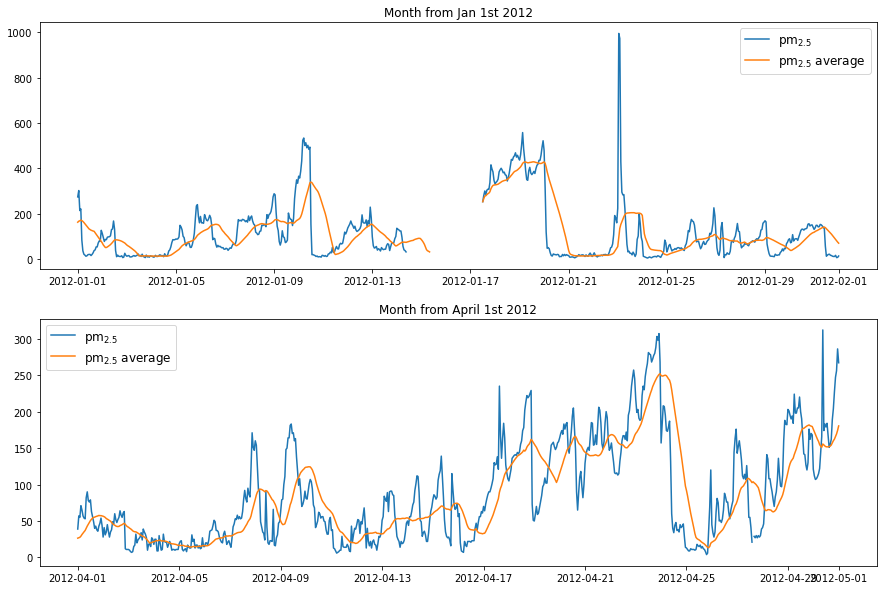

In [13]:
jan_1_12 = pd.Timestamp(2012,1,1,0)
apr_1_12 = pd.Timestamp(2012,4,1,0)
addMonth = pd.DateOffset(months=1)

fig, (a1, a2) = plt.subplots(2, 1, figsize=(15, 10))
a1.plot(b3.loc[jan_1_12:jan_1_12+addMonth,'pm'], label='pm$_{2.5}$')
a1.plot(b3.loc[jan_1_12:jan_1_12+addMonth,'pmsmooth'], label='pm$_{2.5}$ average')

a2.plot(b3.loc[apr_1_12:apr_1_12+addMonth,'pm'], label='pm$_{2.5}$')
a2.plot(b3.loc[apr_1_12:apr_1_12+addMonth,'pmsmooth'], label='pm$_{2.5}$ average')

a1.legend(fontsize=12)
a2.legend(fontsize=12)
a1.set_title('Month from Jan 1st 2012')
a2.set_title('Month from April 1st 2012')


## Section 5: Stochastic Process
This section uses simulated data to .............

### Section 5.1: Gaussian Noise and the Random Walk

In [14]:
import numpy as np

num = 1000
randvals = np.random.randn(num)


In [15]:
delta = 0.05

sp = pd.DataFrame()
sp = sp.assign(noise = randvals, 
               cum = np.append(0, randvals[:-1]).cumsum(), 
               delta= [n * delta for n in range(0,num)])

sp = sp.assign(walk = sp.apply(sum, axis=1),
               n = range(0,1000)) #.drop(labels=['cum','delta'], axis=1)

sp[:-5]


,noise,cum,delta,walk,n
0,-0.158144,0.000000,0.00,-0.158144,0
1,0.365815,-0.158144,0.05,0.257671,1
2,-0.189642,0.207671,0.10,0.118029,2
3,-0.262400,0.018029,0.15,-0.094371,3
4,-0.624095,-0.244371,0.20,-0.668466,4
...,...,...,...,...,...
990,-0.419874,-35.724675,49.50,13.355451,990
991,1.925910,-36.144549,49.55,15.331360,991
992,-0.423842,-34.218640,49.60,14.957518,992
993,0.429761,-34.642482,49.65,15.437279,993


Text(0.5, 1.0, 'Random Walk with Offset')

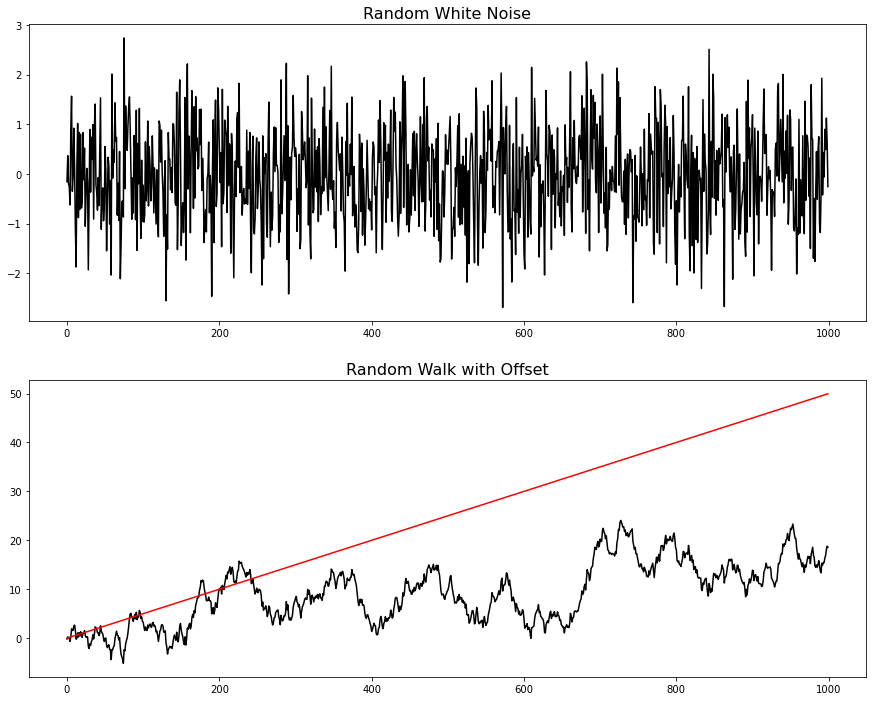

In [16]:
fig, (a1, a2) = plt.subplots(2, 1, figsize=(15, 12))
a1.plot(sp.loc[:,'noise'],  color='k',)
a2.plot(sp.loc[:,'walk'], color='k')
a2.plot(sp.loc[:,'delta'], color='r')

a1.set_title('Random White Noise', fontsize=16)
a2.set_title('Random Walk with Offset', fontsize=16)


### Section 5.2: Scatters and Distributions
We look at the scatter points and distribution of the random data.

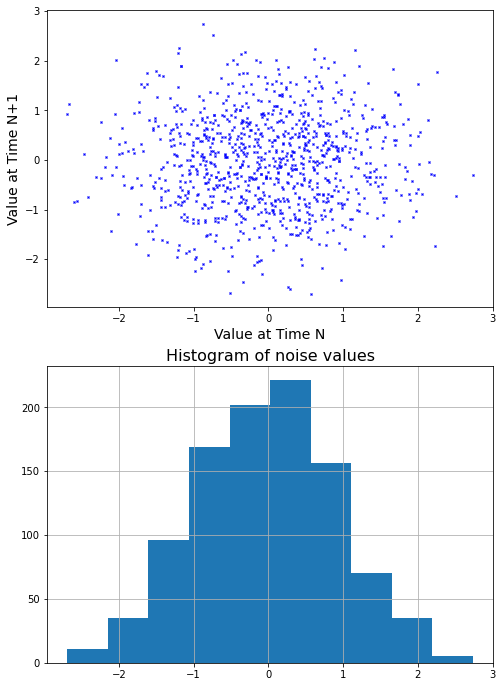

In [17]:
fig, (a1,a2) = plt.subplots(2,1, figsize=(8, 12))
a1.plot(sp.noise[:-1], sp.noise[1:], linestyle='None', marker='x', color='b', markersize=2)
a1.set_xlabel('Value at Time N', fontsize=14)
a1.set_ylabel('Value at Time N+1', fontsize=14)

sp.noise.hist(ax = a2)
_ = a2.set_title('Histogram of noise values', fontsize=16)

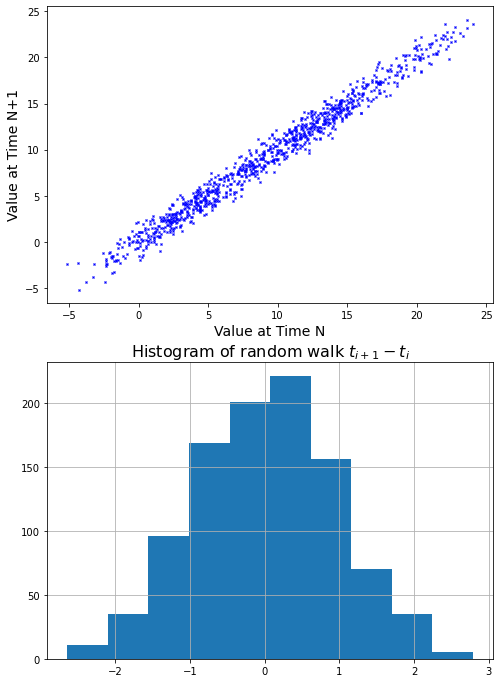

In [18]:
fig, (a1,a2) = plt.subplots(2,1, figsize=(8, 12))

a1.plot(sp.walk[:-1], sp.walk[1:], linestyle='None', marker='x', color='b', markersize=2)
a1.set_xlabel('Value at Time N', fontsize=14)
a1.set_ylabel('Value at Time N+1', fontsize=14)

(sp.walk.shift(-1) - sp.walk).hist(ax=a2)
_ = a2.set_title('Histogram of random walk $t_{i+1} - t_i$', fontsize=16)

### Section 5.3: Periodic Processes

In [19]:
sp = sp.assign(
    period1 = sp.apply(lambda r: 5 * np.sin(r.n * np.pi / 100) + r.noise, axis = 1))
sp = sp.assign(
    period2 = sp.period1/1.5 + sp.apply(lambda r: 2 * np.sin(r.n * np.pi / 5), axis=1))

Text(0.5, 1.0, 'Two Periodicities with Noise')

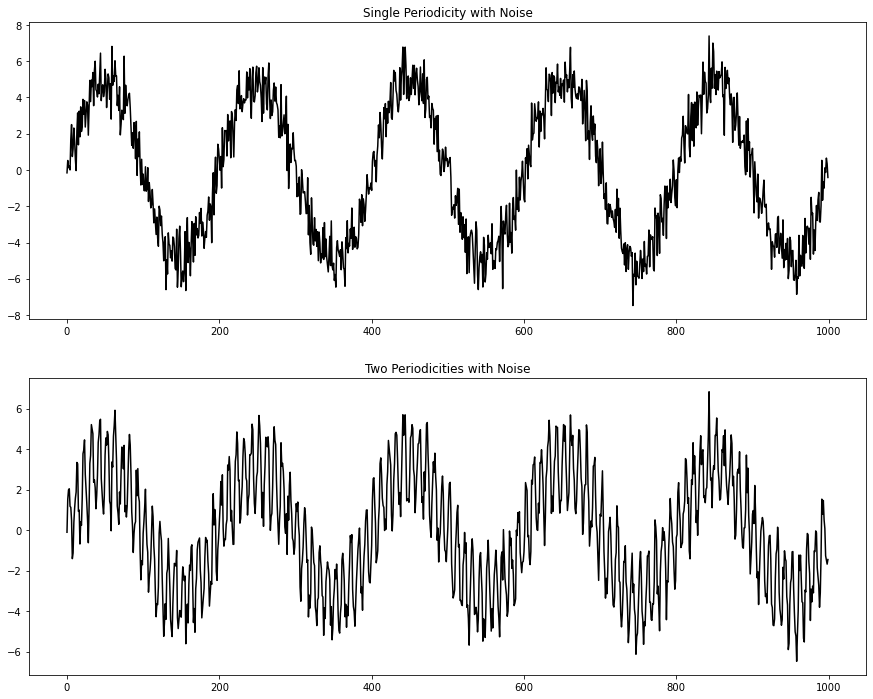

In [20]:
fig, (a1, a2) = plt.subplots(2, 1, figsize=(15, 12))
a1.plot(sp.loc[:,'period1'],  color='k',)
a2.plot(sp.loc[:,'period2'], color='k')


a1.set_title('Single Periodicity with Noise')
a2.set_title('Two Periodicities with Noise')

## Section 6: Time Series Regression

This example of regression on the Beijing data uses daily averages with:
  * A lagged (or time shifted) auto-regression
  * Three other time series variables 
  
First we construct a data frame. We drop the NaN values (some are created by the shift, but there are many more. This should be investigated.)

In [21]:
bdaily = pd.DataFrame(data = {
    'pm_av_tdy' : beijing2.loc[:,'pm2.5'].resample('24H').mean(),
    'meanTemp' : beijing2.loc[:,'TEMP'].resample('24H').mean(),
    'meanIws' : beijing2.loc[:,'Iws'].resample('24H').mean(),
    'meanPres' : beijing2.loc[:,'PRES'].resample('24H').mean(),
    'pm_av_tmw' : beijing2.loc[:,'pm2.5'].resample('24H').mean().shift(-1)
})
bdaily = bdaily.dropna()
bdaily

,pm_av_tdy,meanTemp,meanIws,meanPres,pm_av_tmw
Time,,,,,
2010-01-02,145.958333,-5.125000,24.860000,1024.750000,78.833333
2010-01-03,78.833333,-8.541667,70.937917,1022.791667,31.333333
2010-01-04,31.333333,-11.500000,111.160833,1029.291667,42.458333
2010-01-05,42.458333,-14.458333,56.920000,1033.625000,56.416667
2010-01-06,56.416667,-12.541667,18.511667,1033.750000,69.000000
...,...,...,...,...,...
2014-12-26,170.250000,-2.791667,2.042500,1031.708333,238.666667
2014-12-27,238.666667,-1.791667,9.278333,1027.833333,197.375000
2014-12-28,197.375000,1.583333,10.948750,1019.958333,159.000000


### Section 6.1: Challenge of Forecasting pm2.5 Tomorrow from Today's Value

To understand the problem we look at the data. 

* What is the distribution of (average daily) pm2.5 values?
* Are there large changes from one day to the next?


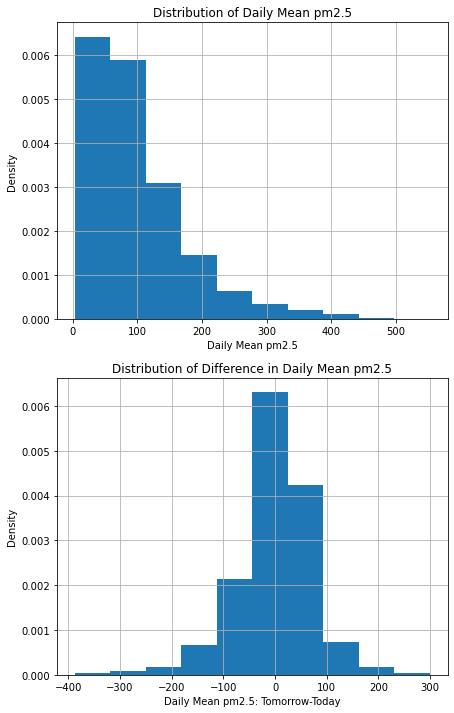

In [22]:
fig, (a1,a2) = plt.subplots(2,1, figsize=(7, 12))

bdaily.pm_av_tdy.hist(density=True, ax=a1)
a1.set_title('Distribution of Daily Mean pm2.5')
a1.set_xlabel('Daily Mean pm2.5')
a1.set_ylabel('Density')

(bdaily.pm_av_tmw - bdaily.pm_av_tdy).hist(density=True, ax=a2)
a2.set_title('Distribution of Difference in Daily Mean pm2.5')
a2.set_xlabel('Daily Mean pm2.5: Tomorrow-Today')
_ = a2.set_ylabel('Density')

We also show a scatter plot of the value today versus the value tomorrow.

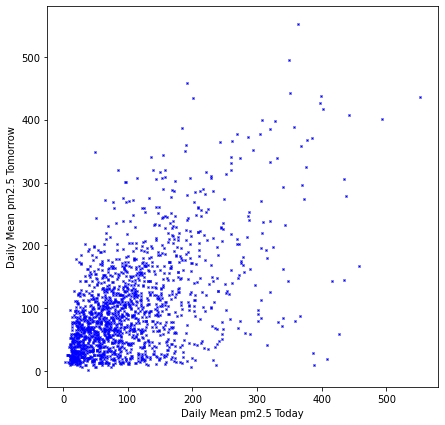

In [23]:
fig, a1 = plt.subplots(1,1, figsize=(7, 7))
a1.plot(bdaily.pm_av_tdy,bdaily.pm_av_tmw, linestyle='None', marker='x', color='b', markersize=2)

a1.set_xlabel('Daily Mean pm2.5 Today')
_ = a1.set_ylabel('Daily Mean pm2.5 Tomorrow')

### Section 6.2: Proposed Regression and Evaluation

We propose a simple regression to forecast the average pm2.5 reading tomorrow.

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.column_stack((bdaily.pm_av_tdy, bdaily.meanTemp, bdaily.meanPres, bdaily.meanIws))
y = bdaily.pm_av_tmw
reg = LinearRegression().fit(X,y)
print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))

The R2 coefficient of determination is 0.341


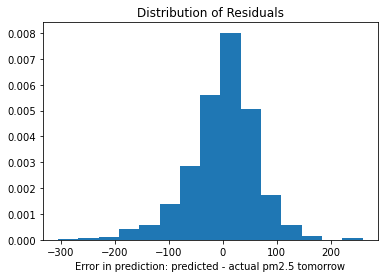

In [25]:
y_hat = reg.predict(X)

fig, a1 = plt.subplots(1, 1)
residuals = y_hat - y
a1.hist(residuals, bins=15, density=True)
a1.set_xlabel('Error in prediction: predicted - actual pm2.5 tomorrow')
_ = a1.set_title('Distribution of Residuals')

**Plot of actual versus predicted values**

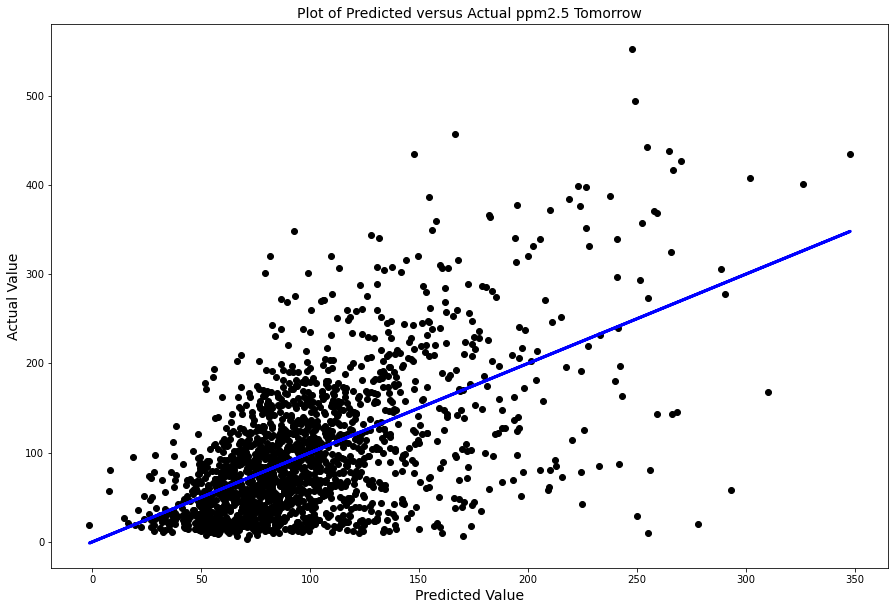

In [26]:
fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(y_hat, y,  color='black')
a.plot(y_hat, y_hat, color='blue', linewidth=3)

a.set_xlabel('Predicted Value', fontsize=14)
a.set_ylabel('Actual Value', fontsize=14)
_ = a.set_title('Plot of Predicted versus Actual ppm2.5 Tomorrow', fontsize=14)

## Section 7: Autocorrelation

This section shows an auto-correlation plot. First we create some synthetic data with known period(s).
  * Variable 'period1' has a period of 30
  * Variable 'period2' combines this with an additional signal with a period of 10

The plots below show the two variables

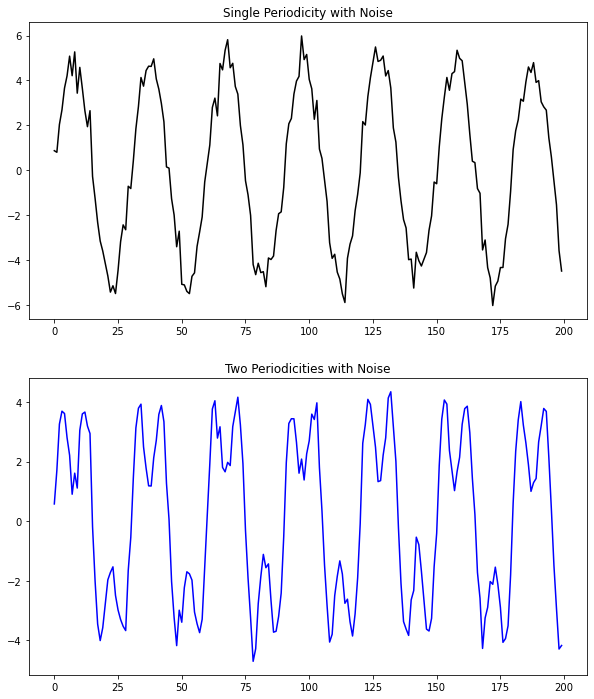

In [27]:
sp2 = pd.DataFrame()
sp2 = sp.assign(noise =  np.random.randn(1000), 
                n = range(0,1000)) 
sp2 = sp2.assign(
      period1 = sp2.apply(lambda r: 5 * np.sin(r.n * np.pi / 15) + r.noise/2, axis = 1))
sp2 = sp2.assign(
      period2 = sp2.period1/1.5 + sp2.apply(lambda r: 2 * np.sin(r.n * np.pi / 5), axis=1))

fig, (a1, a2) = plt.subplots(2, 1, figsize=(10, 12))
a1.plot(sp2.loc[sp2.n < 200,'period1'],  color='k',)
a2.plot(sp2.loc[sp2.n < 200,'period2'], color='b')


a1.set_title('Single Periodicity with Noise')
_ = a2.set_title('Two Periodicities with Noise')

The auto-correlation plots show the correlation of the variables with lagged version of teh same variable, for different lags.

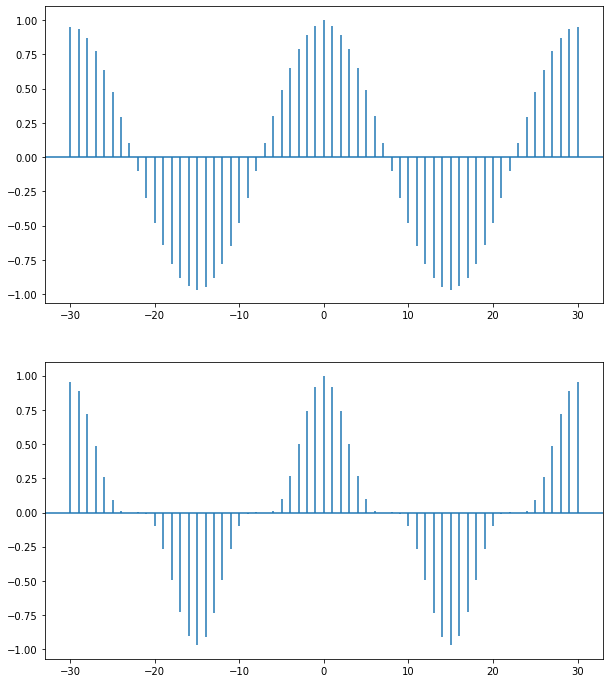

In [28]:
fig, (a1, a2) = plt.subplots(2,1, figsize=(10,12))
_ = a1.acorr(sp2.period1, maxlags=30)
_ = a2.acorr(sp2.period2, maxlags=30)

The first plot shows that
  * The correlation is most negative with sifts of +/- 15
  * The correlation is most positive with shifts of +/- 30
  
The second plot is a slightly different shape but the second period is not shown clearly. To do this, we need to control for the first auto-correlation. This is done using [partial auto-correlation](https://en.wikipedia.org/wiki/Partial_autocorrelation_function) which is not shown here.